In [ ]:
from tensorflow import keras
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Activation , Dropout , Flatten
from tensorflow.keras.layers import Conv2D , MaxPooling2D

import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
(x_train,y_train),(x_test,y_test) = cifar10.load_data()
print('x_train shape:',x_train.shape)
print(x_train.shape[0] , 'train samples')
print(x_test.shape[0], 'test samples')

x_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples


In [ ]:
x_train[444].shape

(32, 32, 3)

[9]


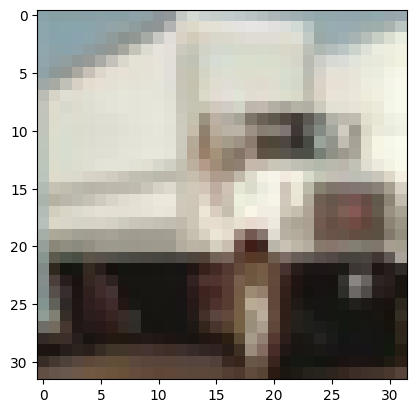

In [ ]:
print(y_train[444])
plt.imshow(x_train[444])

In [ ]:
y_train

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

In [ ]:
num_classes = 10
# converting to one-hot-encoded form output
y_train = keras.utils.to_categorical(y_train,num_classes)
y_test = keras.utils.to_categorical(y_test,num_classes)

In [ ]:
y_train[444]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=float32)

In [ ]:
from numpy import float32
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255 #to make every pixel value <1 & > and all pixel value will be from 0 - 255
x_test /= 255

In [ ]:
x_train.shape

(50000, 32, 32, 3)

In [ ]:
#CREATING CNN-ARCHITECTURE COMBINED WITH DEEP-L-SEQUENTIAL NEURAL NETWORK

model_1 = Sequential()

model_1.add(Conv2D(32 , (5,5) , strides = (2,2) , padding = 'same' ,input_shape = x_train.shape[1:]))
model_1.add(Activation('relu'))

model_1.add(Conv2D(32, (5,5) , strides = (2,2)))
model_1.add(Activation('relu'))

model_1.add(MaxPooling2D(pool_size = (2,2)))
model_1.add(Dropout(0.25))

model_1.add(Flatten())
model_1.add(Dense(512))
model_1.add(Activation('relu'))
model_1.add(Dropout(0.5))
model_1.add(Dense(num_classes))
model_1.add(Activation('softmax'))

model_1.summary()



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 16, 16, 32)        2432      
                                                                 
 activation (Activation)     (None, 16, 16, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 6, 6, 32)          25632     
                                                                 
 activation_1 (Activation)   (None, 6, 6, 32)          0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 3, 3, 32)         0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 3, 3, 32)          0         
                                                        

In [12]:
#IMPLEMENTATION OF MODEL
batch_size = 32

opt = keras.optimizers.RMSprop(learning_rate = 0.005 , weight_decay = 1e-6)

model_1.compile (loss = 'categorical_crossentropy' , optimizer = opt, metrics = ['accuracy'])

model_1.fit(x_train , y_train , batch_size= batch_size , epochs = 15, validation_data=(x_test, y_test), shuffle = True)


Epoch 1/15
1563/1563 [==============================] - 44s 27ms/step - loss: 1.9040 - accuracy: 0.3126 - val_loss: 1.6874 - val_accuracy: 0.3769
Epoch 2/15
1563/1563 [==============================] - 37s 24ms/step - loss: 1.8134 - accuracy: 0.3603 - val_loss: 1.6522 - val_accuracy: 0.4033
Epoch 3/15
1563/1563 [==============================] - 40s 26ms/step - loss: 1.8513 - accuracy: 0.3516 - val_loss: 1.7100 - val_accuracy: 0.3733
Epoch 4/15
1563/1563 [==============================] - 38s 24ms/step - loss: 1.8662 - accuracy: 0.3435 - val_loss: 2.0032 - val_accuracy: 0.3411
Epoch 5/15
1563/1563 [==============================] - 38s 24ms/step - loss: 1.8906 - accuracy: 0.3361 - val_loss: 1.6841 - val_accuracy: 0.4096
Epoch 6/15
1563/1563 [==============================] - 37s 23ms/step - loss: 1.9349 - accuracy: 0.3242 - val_loss: 2.0118 - val_accuracy: 0.3101
Epoch 7/15
1563/1563 [==============================] - 37s 23ms/step - loss: 1.9178 - accuracy: 0.3244 - val_loss: 1.8192 -

In [13]:
import numpy as np

y_pred_prob = model_1.predict(x_test)
y_pred_classes = np.argmax(y_pred_prob, axis=1)
y_pred_classes

313/313 [==============================] - 2s 6ms/step


array([6, 8, 8, ..., 3, 3, 7])

In [14]:
# BUILDING MORE COMPLICATED CNN + Dense Classification NEURAL NETWORK ARCHITECTURE
model_2 = Sequential()

model_2.add(Conv2D(32 , (3,3) , padding = 'same' ,input_shape = x_train.shape[1:]))
model_2.add(Activation ('relu'))
model_2.add(Conv2D(32 , (3,3)))
model_2.add(Activation ("relu"))
model_2.add(MaxPooling2D(pool_size=(2,2)))
model_2.add(Dropout(0.25))

model_2.add(Conv2D(64 , (3,3) , padding = 'same'))
model_2.add(Activation('relu'))
model_2.add(Conv2D(64 , (3,3)))
model_2.add(Activation ("relu"))
model_2.add(MaxPooling2D(pool_size=(2,2)))
model_2.add(Dropout(0.25))

model_2.add(Flatten())
model_2.add(Dense(512))
model_2.add(Activation('relu'))
model_2.add(Dropout(0.5))
model_2.add(Dense(num_classes))
model_2.add(Activation('softmax'))

model_2.summary()



Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 activation_4 (Activation)   (None, 32, 32, 32)        0         
                                                                 
 conv2d_3 (Conv2D)           (None, 30, 30, 32)        9248      
                                                                 
 activation_5 (Activation)   (None, 30, 30, 32)        0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 15, 15, 32)       0         
 2D)                                                             
                                                                 
 dropout_2 (Dropout)         (None, 15, 15, 32)        0         
                                                      

In [15]:
batch_size = 32

opt = keras.optimizers.RMSprop(learning_rate = 0.005 )

model_1.compile (loss = 'categorical_crossentropy' , optimizer = opt, metrics = ['accuracy'])

model_1.fit(x_train , y_train , batch_size= batch_size , epochs = 15, validation_data=(x_test, y_test), shuffle = True)


Epoch 1/15
1563/1563 [==============================] - 37s 23ms/step - loss: 1.9489 - accuracy: 0.3058 - val_loss: 1.8055 - val_accuracy: 0.3551
Epoch 2/15
1563/1563 [==============================] - 37s 24ms/step - loss: 1.9494 - accuracy: 0.3041 - val_loss: 1.8931 - val_accuracy: 0.3123
Epoch 3/15
1563/1563 [==============================] - 35s 23ms/step - loss: 1.9489 - accuracy: 0.3016 - val_loss: 1.9640 - val_accuracy: 0.2757
Epoch 4/15
1563/1563 [==============================] - 36s 23ms/step - loss: 1.9670 - accuracy: 0.2970 - val_loss: 1.7238 - val_accuracy: 0.3725
Epoch 5/15
1563/1563 [==============================] - 36s 23ms/step - loss: 1.9694 - accuracy: 0.2906 - val_loss: 1.8010 - val_accuracy: 0.3525
Epoch 6/15
1563/1563 [==============================] - 35s 22ms/step - loss: 1.9629 - accuracy: 0.2950 - val_loss: 1.7388 - val_accuracy: 0.3708
Epoch 7/15
1563/1563 [==============================] - 36s 23ms/step - loss: 1.9699 - accuracy: 0.2931 - val_loss: 1.7987 -